# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('clustered_nigeria_houses_data.csv')
df.head()

,Unnamed: 0,bedrooms,bathrooms,toilets,parking_space,price,title,town,state,cluster
0,2,4,5,5,4,120000000,2,99,16,2
1,6,4,5,5,4,65000000,2,99,16,0
2,10,3,4,5,4,25000000,6,101,1,0
3,11,6,6,6,4,45000000,4,126,8,0
4,13,4,4,5,4,70000000,4,99,16,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10687 entries, 0 to 10686
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     10687 non-null  int64
 1   bedrooms       10687 non-null  int64
 2   bathrooms      10687 non-null  int64
 3   toilets        10687 non-null  int64
 4   parking_space  10687 non-null  int64
 5   price          10687 non-null  int64
 6   title          10687 non-null  int64
 7   town           10687 non-null  int64
 8   state          10687 non-null  int64
 9   cluster        10687 non-null  int64
dtypes: int64(10)
memory usage: 835.0 KB


In [4]:
df.describe()

,Unnamed: 0,bedrooms,bathrooms,toilets,parking_space,price,title,town,state,cluster
count,10687.000000,10687.000000,10687.000000,10687.000000,10687.0,1.068700e+04,10687.000000,10687.000000,10687.000000,10687.000000
mean,12202.326939,4.340039,4.646486,5.257322,4.0,1.055270e+08,2.649387,83.083747,14.002339,0.722934
std,7017.044642,0.708383,0.710765,0.693299,0.0,6.917849e+07,1.605054,35.050425,5.275854,0.895672
min,2.000000,3.000000,3.000000,4.000000,4.0,4.000000e+05,0.000000,0.000000,0.000000,0.000000
25%,6072.000000,4.000000,4.000000,5.000000,4.0,5.700000e+07,2.000000,64.000000,16.000000,0.000000
50%,12298.000000,4.000000,5.000000,5.000000,4.0,8.500000e+07,2.000000,99.000000,16.000000,0.000000
75%,18246.000000,5.000000,5.000000,6.000000,4.0,1.400000e+08,4.000000,99.000000,16.000000,2.000000
max,24325.000000,6.000000,6.000000,7.000000,4.0,3.200000e+08,6.000000,152.000000,21.000000,2.000000


<ipython-input-5-ec8343f207d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='viridis')


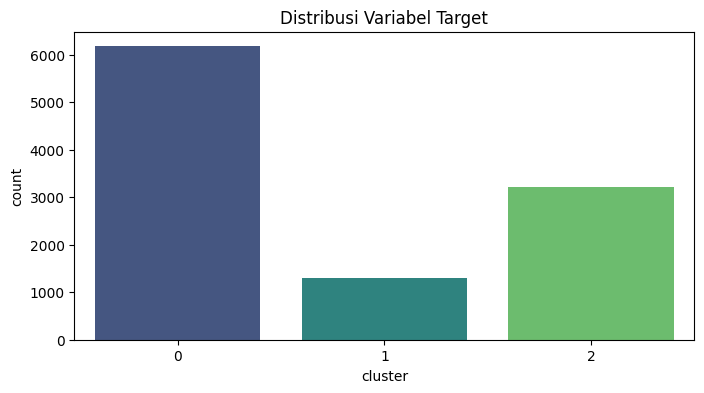

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(x='cluster', data=df, palette='viridis')
plt.title('Distribusi Variabel Target')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
data_features = df.drop('cluster', axis=1)
data_labels = df['cluster']
features_train, features_test, labels_train, labels_test = train_test_split(
    data_features, data_labels, test_size=0.2, random_state=42
)

In [7]:
print(f"Training set shape: features_train={features_train.shape}, labels_train={labels_train.shape}")
print(f"Test set shape: features_test={features_test.shape}, labels_test={labels_test.shape}")

Training set shape: features_train=(8549, 9), labels_train=(8549,)
Test set shape: features_test=(2138, 9), labels_test=(2138,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
# Membuat model
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC()
lc = LogisticRegression()

# Melatih model
dt = dt.fit(features_train, labels_train)
knn.fit(features_train, labels_train)
svm.fit(features_train, labels_train)
lc.fit(features_train, labels_train)

print("Model training selesai.")

Model training selesai.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [9]:
def evaluate_model(model, features_test, labels_test):
    labels_pred = model.predict(features_test)

    results = {
        'Accuracy': accuracy_score(labels_test, labels_pred),
        'Precision': precision_score(labels_test, labels_pred, average='macro', zero_division=0),
        'Recall': recall_score(labels_test, labels_pred, average='macro'),
        'F1-Score': f1_score(labels_test, labels_pred, average='macro')
    }
    return results

In [10]:
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {

    'Decision Tree (DT)': evaluate_model(dt, features_test, labels_test),
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, features_test, labels_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, features_test, labels_test),
    'Logistic Regression (LC)': evaluate_model(lc, features_test, labels_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0            Decision Tree (DT)  0.999532   0.998737  0.999511  0.999123
1     K-Nearest Neighbors (KNN)  0.999532   0.998737  0.999511  0.999123
2  Support Vector Machine (SVM)  0.999532   0.998737  0.999511  0.999123
3      Logistic Regression (LC)  0.748831   0.698444  0.730644  0.711889


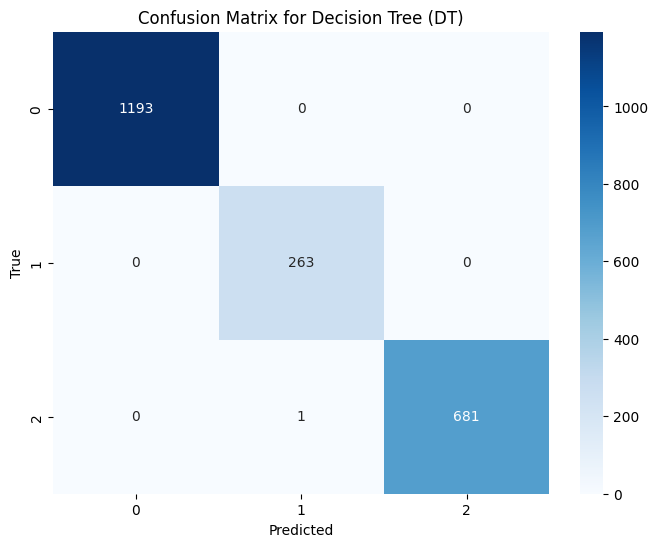

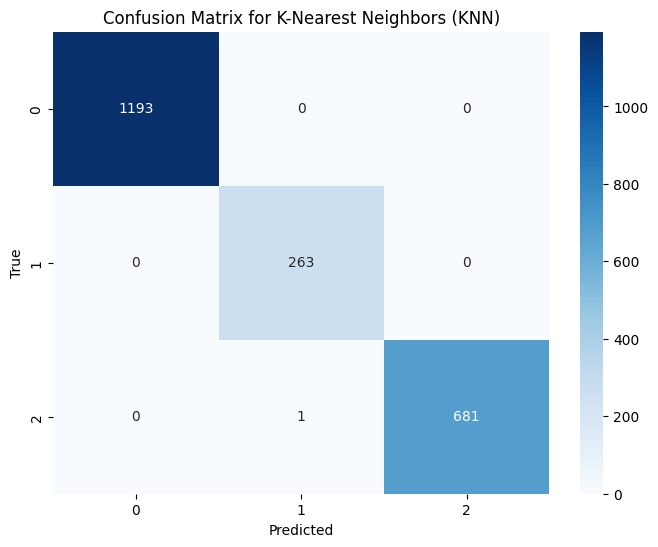

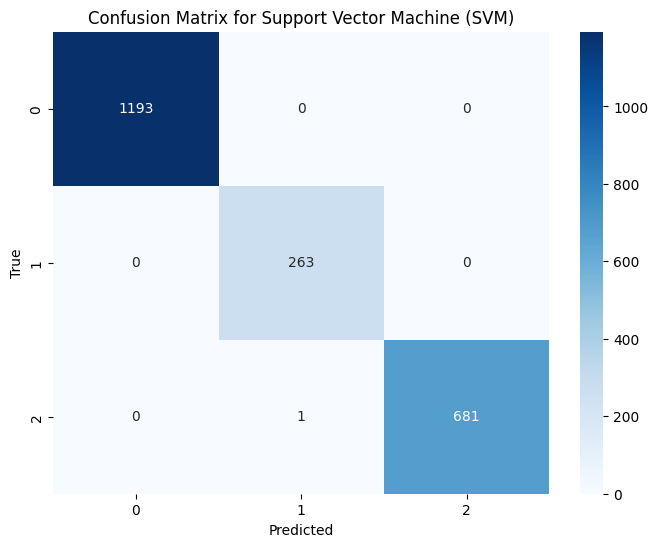

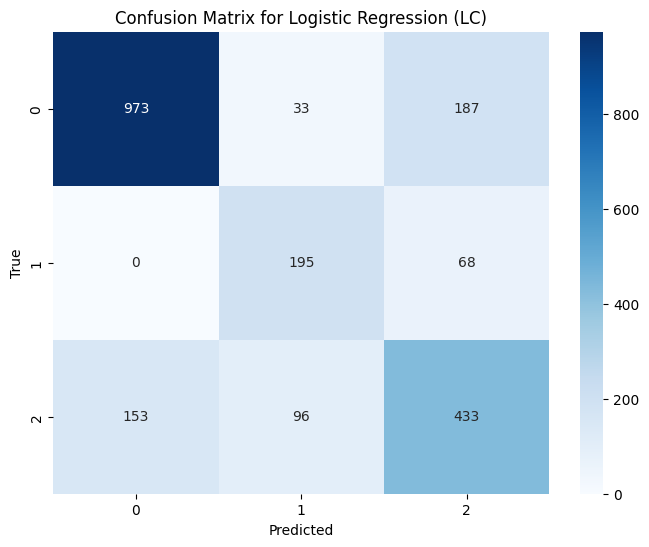

In [11]:
def plot_confusion_matrix(model, features_test, labels_test, model_name):
    labels_pred = model.predict(features_test)
    cm = confusion_matrix(labels_test, labels_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(dt, features_test, labels_test, 'Decision Tree (DT)')
plot_confusion_matrix(knn, features_test, labels_test, 'K-Nearest Neighbors (KNN)')
plot_confusion_matrix(svm, features_test, labels_test, 'Support Vector Machine (SVM)')
plot_confusion_matrix(lc, features_test, labels_test, 'Logistic Regression (LC)')

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [12]:
# Hyperparameter tuning for each model (Optional)
print("Tuning hyperparameters...")

# RancomizedSearchCV for Decision Tree
dt_params = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
dt_random = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=3, scoring='f1_macro')
dt_random.fit(features_train, labels_train)

# RancomizedSearchCV for KNN
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_random = RandomizedSearchCV(KNeighborsClassifier(), knn_params, cv=3, scoring='f1_macro')
knn_random.fit(features_train, labels_train)

# RancomizedSearchCV for SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_random = RandomizedSearchCV(SVC(random_state=42), svm_params, n_iter=5, cv=3, scoring='f1_macro', random_state=42)
svm_random.fit(features_train_scaled, labels_train)

# RandomizedSearchCV for Logistic Regression
lc_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
lc_random = RandomizedSearchCV(LogisticRegression(random_state=42), lc_params, cv=3, scoring='f1_macro', n_iter=10, random_state=42)
lc_random.fit(features_train_scaled, labels_train)

Tuning hyperparameters...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


NameError: name 'features_train_scaled' is not defined

In [13]:
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [14]:
# Hyperparameter tuning for each model (Optional)
print("Tuning hyperparameters...")

# RancomizedSearchCV for Decision Tree
dt_params = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 10, 20], 'min_samples_leaf': [1, 5, 10]}
dt_random = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=3, scoring='f1_macro')
dt_random.fit(features_train, labels_train)

# RancomizedSearchCV for KNN
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_random = RandomizedSearchCV(KNeighborsClassifier(), knn_params, cv=3, scoring='f1_macro')
knn_random.fit(features_train, labels_train)

# RancomizedSearchCV for SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_random = RandomizedSearchCV(SVC(random_state=42), svm_params, n_iter=5, cv=3, scoring='f1_macro', random_state=42)
svm_random.fit(features_train_scaled, labels_train)

# RandomizedSearchCV for Logistic Regression
lc_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
lc_random = RandomizedSearchCV(LogisticRegression(random_state=42), lc_params, cv=3, scoring='f1_macro', n_iter=10, random_state=42)
lc_random.fit(features_train_scaled, labels_train)

Tuning hyperparameters...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.

RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='f1_macro')

In [15]:
# Best hyperparameters
print("Best hyperparameters for Decision Tree:", dt_random.best_params_)
print("Best hyperparameters for KNN:", knn_random.best_params_)
print("Best hyperparameters for SVM:", svm_random.best_params_)
print("Best hyperparameters for Logistic Regression:", lc_random.best_params_)

Best hyperparameters for Decision Tree: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': None}
Best hyperparameters for KNN: {'weights': 'distance', 'n_neighbors': 3}
Best hyperparameters for SVM: {'kernel': 'linear', 'C': 10}
Best hyperparameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 300, 'C': 10}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [16]:
# Evaluasi model dengan hyperparameter terbaik
best_dt_model = dt_random.best_estimator_
best_knn_model = knn_random.best_estimator_
best_svm_model = svm_random.best_estimator_
best_lc_model = lc_random.best_estimator_

In [17]:
tuned_results = {
    'Decision Tree (Tuned)': evaluate_model(best_dt_model, features_test, labels_test),
    'K-Nearest Neighbors (Tuned)': evaluate_model(best_knn_model, features_test, labels_test),
    'Support Vector Machine (Tuned)': evaluate_model(best_svm_model, features_test_scaled, labels_test),
    'Logistic Regression (Tuned)': evaluate_model(best_lc_model, features_test_scaled, labels_test)
}

In [18]:
tuned_summary_df = pd.DataFrame(tuned_results).T
print("Results after tuning:")
print(tuned_summary_df)

Results after tuning:
                                Accuracy  Precision    Recall  F1-Score
Decision Tree (Tuned)           0.999532   0.998737  0.999511  0.999123
K-Nearest Neighbors (Tuned)     0.999532   0.998737  0.999511  0.999123
Support Vector Machine (Tuned)  1.000000   1.000000  1.000000  1.000000
Logistic Regression (Tuned)     0.999532   0.998737  0.999511  0.999123


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).

Hasil evaluasi sebelum di tuning

Model | Accuracy | Precision | Recall | F1-Score

*   Decision Tree (DT) | 0.999532 | 0.998737 | 0.999511	| 0.999123
*   K-Nearest Neighbors (KNN) |	0.999532 |	0.998737 |	0.999511 | 0.999123
*   Support Vector Machine (SVM) | 0.999532	| 0.998737 | 0.999511 | 0.999123
*   Logistic Regression (LC) | 0.748831 | 0.698444 | 0.730644 | 0.711889


Hasil evaluasi setelah di tuning

Model | Accuracy | Precision | Recall | F1-Score
*   Decision Tree (Tuned) | 0.999532 | 0.998737 | 0.999511	| 0.999123
*   K-Nearest Neighbors (Tuned) |	0.999532 |	0.998737 |	0.999511 | 0.999123
*   Support Vector Machine (Tuned) | 1.000000	| 1.000000 | 1.000000 | 1.000000
*   Logistic Regression (Tuned) | 0.999532 | 0.998737 | 0.999511 | 0.999123

**Decision Tree dan KNN:**

Sebelum Tuning: Kedua model menunjukkan metrik evaluasi yang sangat tinggi, hampir mencapai skor sempurna.

Setelah Tuning: Tidak ada peningkatan yang signifikan setelah tuning, yang menunjukkan bahwa model Decision Tree dan KNN sudah cukup optimal sebelum tuning.

**Support Vector Machine (SVM):**

Sebelum Tuning: Model SVM menunjukkan metrik evaluasi yang sangat tinggi, hampir mencapai skor sempurna.

Setelah Tuning: Model SVM mencapai skor sempurna untuk semua metrik evaluasi, yang menunjukkan bahwa tuning hyperparameter berhasil meningkatkan performa model.

**Logistic Regression (LC):**

Sebelum Tuning: Model Logistic Regression menunjukkan metrik evaluasi yang cukup baik, dengan akurasi sekitar 74.88%.

Setelah Tuning: Model Logistic Regression menunjukkan peningkatan performa yang signifikan, mencapai metrik evaluasi yang hampir sempurna, yang menunjukkan bahwa tuning hyperparameter sangat efektif.

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  Semua model menunjukkan metrik evaluasi yang sangat tinggi setelah tuning, sehingga tidak ada kelas tertentu yang memiliki precision atau recall yang rendah.

  - Apakah model mengalami overfitting atau underfitting?
   Model SVM dan Logistic Regression setelah tuning menunjukkan metrik evaluasi yang sangat tinggi, yang dapat mengindikasikan kemungkinan overfitting.

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
Gunakan cross-validation yang lebih ekstensif untuk memastikan bahwa hasil evaluasi konsisten dan model tidak mengalami overfitting. Lakukan tuning hyperparameter yang lebih ekstensif menggunakan GridSearchCV untuk mencoba lebih banyak kombinasi hyperparameter. Eksplorasi algoritma lain seperti Random Forest atau Gradient Boosting untuk melihat apakah ada peningkatan performa lebih lanjut. Jika memungkinkan, tambahkan lebih banyak data untuk meningkatkan generalisasi model.
